<a href="https://colab.research.google.com/github/Berlinzm/Talento-TECH/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Miniproyecto:** Predicción Simple de Calidad del Agua para Mejorar el Uso y Consumo en Comunidades Rurales.

**Objetivo general:**
Con datos básicos de parámetros físicos y químicos del agua (pH, turbidez, temperatura, etc.),
el modelo **predice** si la calidad del agua es aceptable o no aceptable para consumo humano o riego.

**Objetivos específicos:**
- Alertar a la comunidad sobre posibles riesgos en el agua potable.
- Facilitar la toma de medidas preventivas para evitar enfermedades.
- Contribuir a una mejor gestión del recurso hídrico mediante el uso de datos simples y accesibles.
"""
print

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns

df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

--- Descriptive Statistics ---
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1

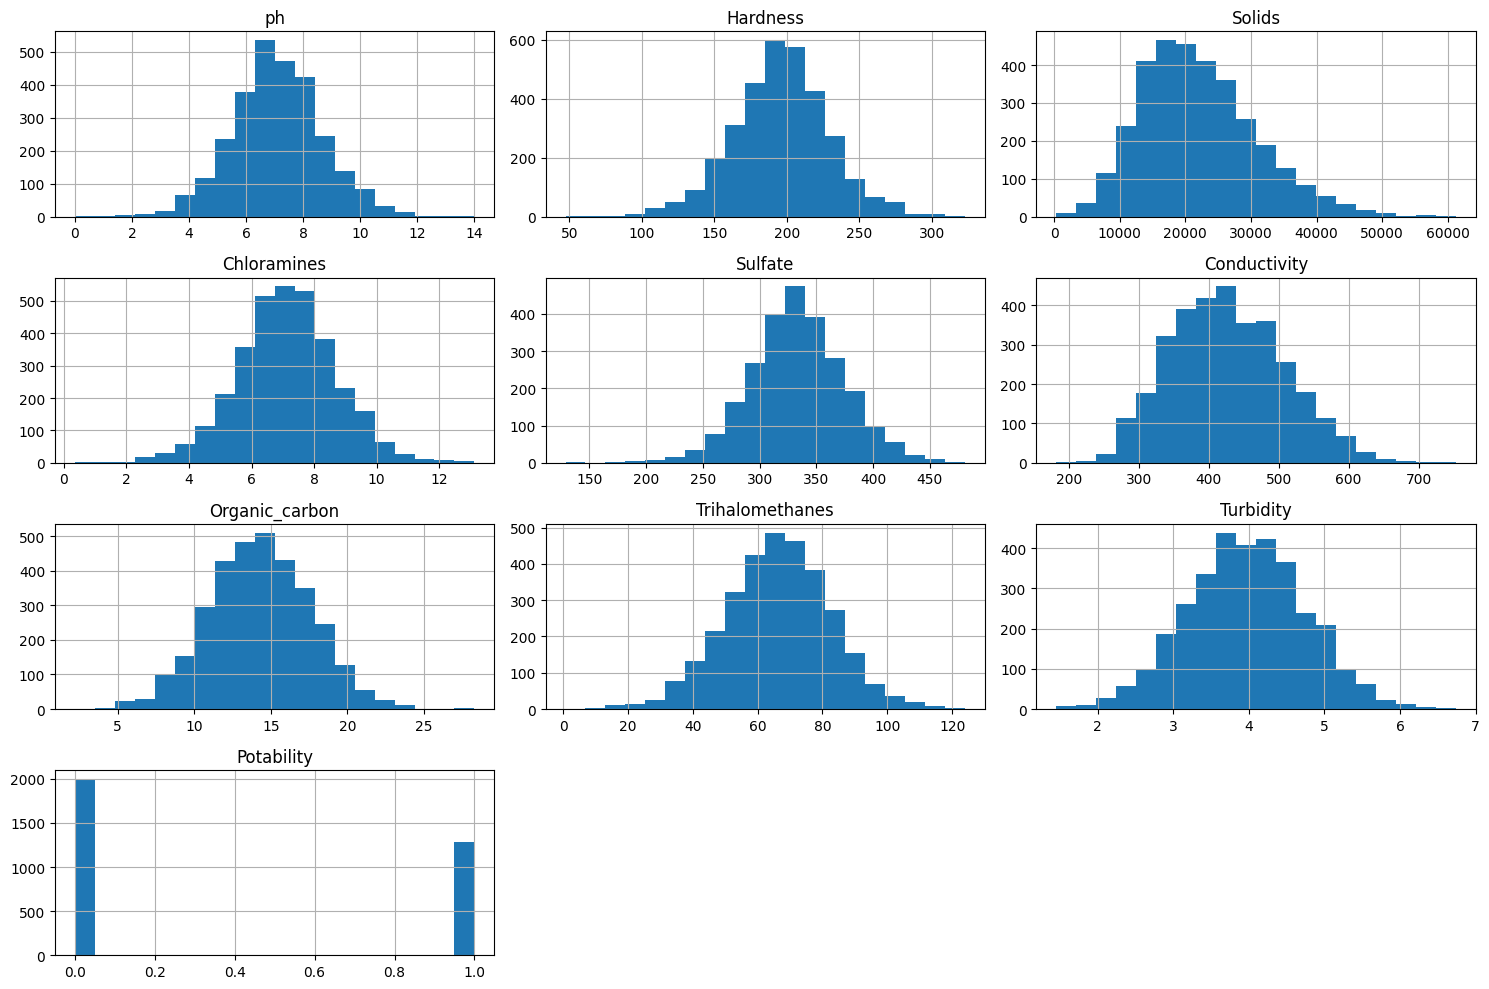

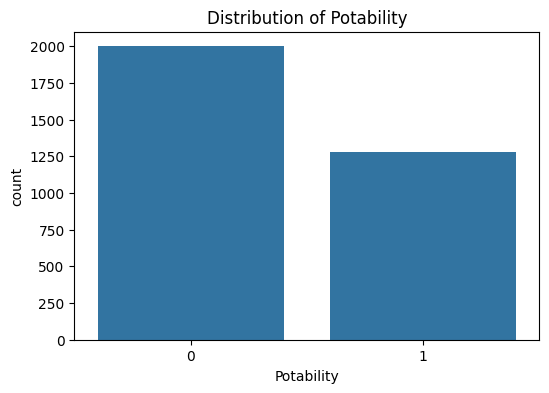

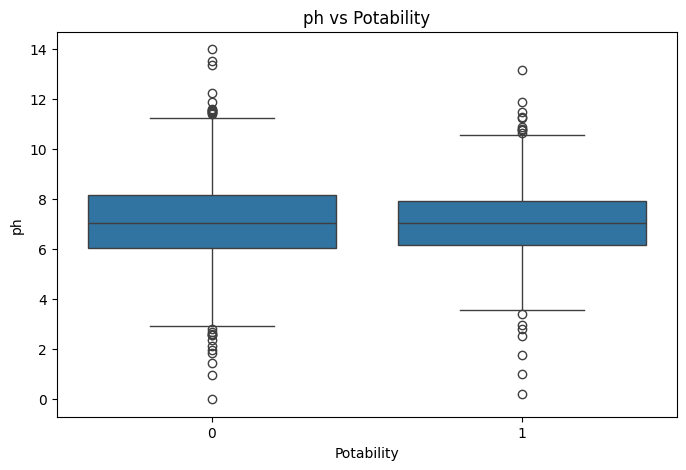

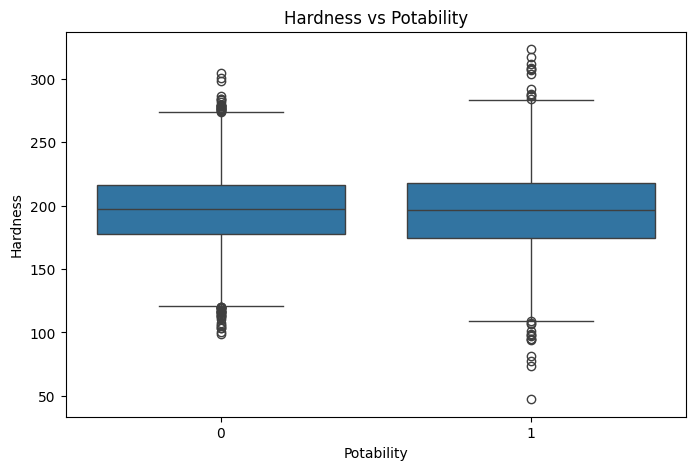

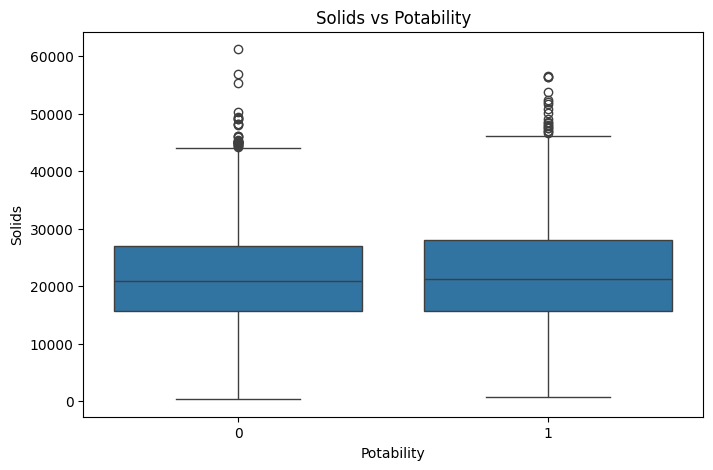

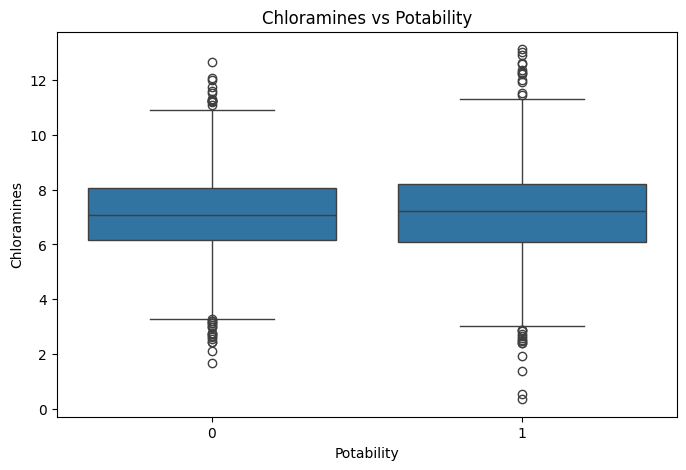

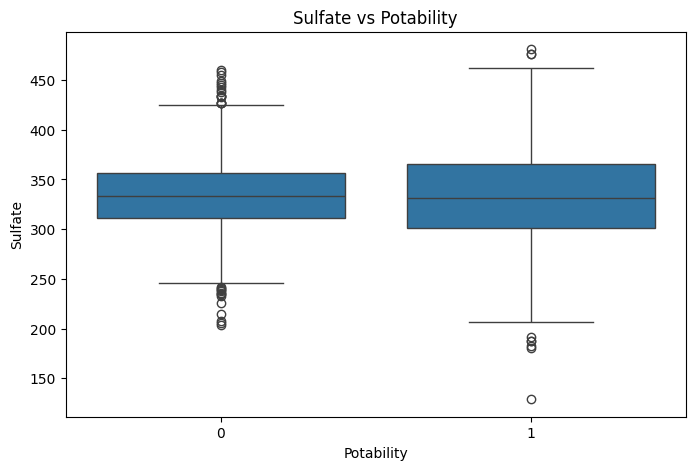

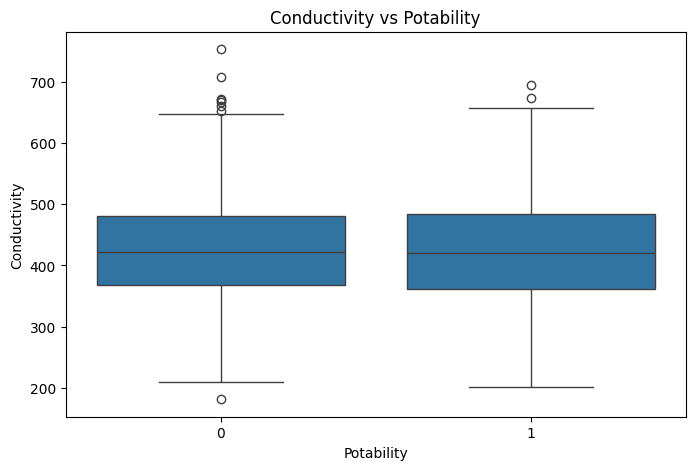

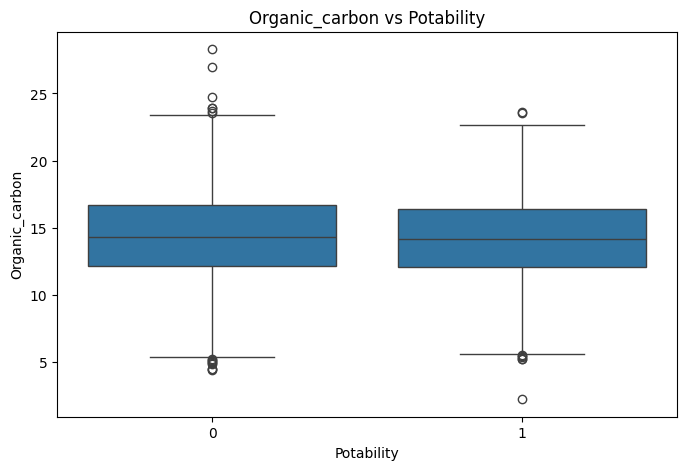

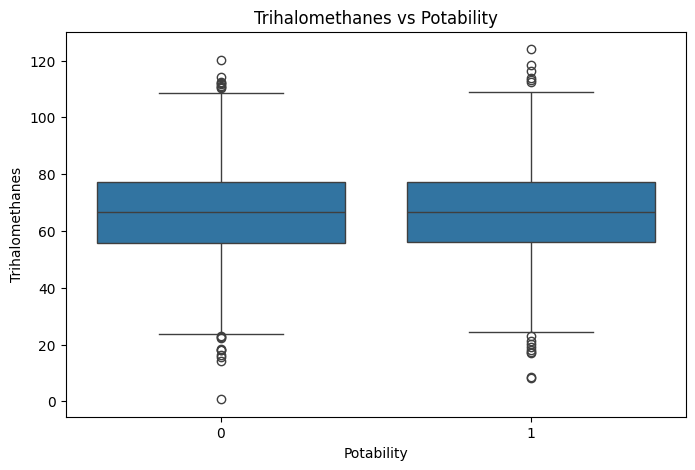

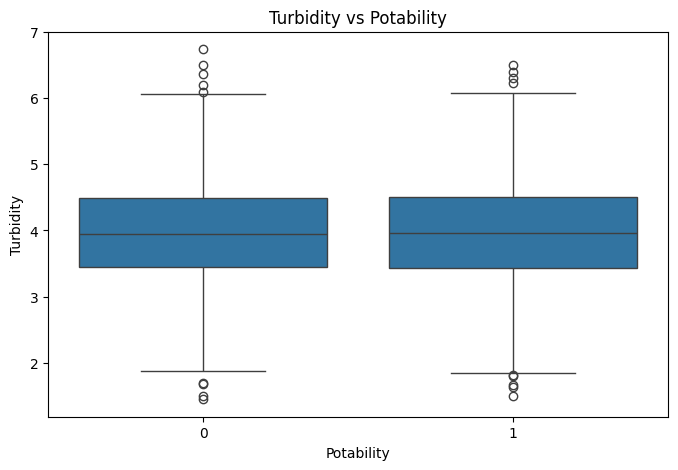

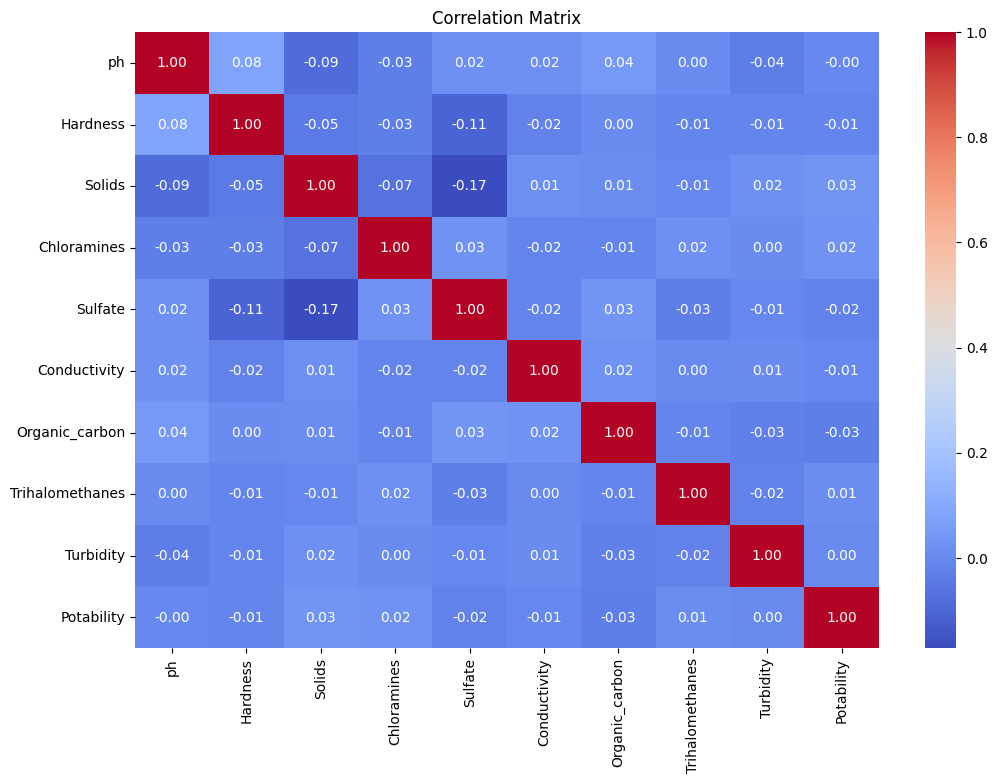


--- Missing Values After Imputation ---
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

--- Cleaned Dataframe Head ---
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.0559

In [ ]:
# prompt: hacer una EDA completo con el siguiente dataset: water_potability.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("water_potability.csv")

# --- Exploratory Data Analysis (EDA) ---

print("--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Value Counts of Potability ---")
print(df['Potability'].value_counts())

# Visualize the distribution of numerical features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability')
plt.show()

# Visualize the relationships between numerical features and Potability
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Potability')

for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x='Potability', y=col, data=df)
  plt.title(f'{col} vs Potability')
  plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# --- Data Cleaning and Preprocessing ---

# Handling missing values: Impute with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())

# Display the first few rows of the cleaned dataframe
print("\n--- Cleaned Dataframe Head ---")
print(df.head())